> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

# **DataSet Details**
### **I decided to use TMDB-Movies dataset and mainly the questions that i try to exolore through this dataset is as following:**

> * Which genres are most popular from year to year?
> * What kinds of properties are associated with movies that have high revenues?
> * Which popular movies had the highest budgets?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

## Summary of steps I'll do in Data Wrangling 
> - check the data types of each column.
> - Check if there is a duplicated rows.
> - check for null values.

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')

In [3]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> ### check the data types of each column

In [5]:
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df_movies.shape

(10866, 21)

In [7]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> ### Check if there is a duplicated rows

In [8]:
 df_movies.duplicated().sum()

1

> ### check for null values 

In [9]:
df_movies.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning 
### Summary of steps I'll do  
> - remove duplicated rows.
> - drop columns that will not be usefull for answering my question
> - i'll only keep these columns popularity, budget, revenue, title, genres, production_company, production_country, release_date AS these columns will help me answering Questions i stated before
> - Drop Null values
> - create new dataset of Zero_revenue and zero_budget to remove it from the main dataset as i need revenue and budget in my analysis it's okay to drop zero values from the datasets

> ### remove duplicated rows

In [10]:
df_movies.drop_duplicates(inplace=True)

In [11]:
df_movies.shape

(10865, 21)

> ### drop columns that will not be usefull for answering my question
> ### i'll only keep these columns popularity, budget, revenue, title, genres, production_company, production_country, release_date AS these columns will help me answering Questions i stated before


In [12]:
df_movies.drop(['imdb_id','id','homepage','tagline','keywords','overview','runtime','budget_adj','revenue_adj'], axis=1,inplace=True)

In [13]:
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


> ### #Drop Null values

In [14]:
 
df_movies.dropna(inplace=True)

In [15]:
df_movies.shape

(9772, 12)

> ### create new dataset of Zero_revenue and zero_budget to remove it from the main dataset as i need revenue and budget in my analysis it's okay to drop zero values from the datasets

In [16]:
 zero = df_movies.query('revenue==0 or budget==0')

In [17]:
zero.shape

(5967, 12)

In [18]:
df_movies.drop(zero.index, inplace=True)


In [19]:
df_movies.shape

(3805, 12)

In [20]:
df_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [21]:
df_movies.tail(5)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,Drama,Chenault Productions,6/21/66,74,7.5,1966
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966
10848,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966


In [22]:
df_movies.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000
mean,1.203784,3.760800e+07,1.089734e+08,534.159001,6.170565,2001.229172
std,1.480569,4.232179e+07,1.772976e+08,883.757588,0.792437,11.329616
min,0.010335,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000
25%,0.470651,1.000000e+07,1.433379e+07,74.000000,5.700000,1995.000000
50%,0.810805,2.500000e+07,4.621664e+07,209.000000,6.200000,2004.000000
75%,1.387163,5.000000e+07,1.260695e+08,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Question 1 (Which genres are most popular from year to year?)
#### Steps
> - Create new dataframe that will contain only wanted columns genres and release_year
> - Create New list that contain all the genres found in the dataFrame
> - Craete new columns that contain count of each Genres
> - Group the dataFrame by release_year and count each Genre in each release_year
> - create new column that contain the most popular Genre in each release_year
> - create new column that contain the Count of  most popular Genre in each release_year
> - Remove all the Genres Count from the year_count
> - Create Year column and change its type to be string to help me in Bar visualization
> - plot scatter plot and bar plot display the most popular Genre Every year starting from  1960 till 2015 
> - Plot Bar chart visulaization that represend the share of the most repeated Genres across the period from 1960 till 2015,
Genres are (Adventure : 4)
(Comedy    : 379)
(Crime     : 3)
(Drama     : 1347)
(History   : 3)
(Thriller  : 61)


In [44]:
df = df_movies.copy()

In [45]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [46]:

#Create new dataframe that will contain only wanted columns genres and release_year

year = df_movies.copy()
year.drop(['popularity','budget','revenue','original_title','cast','director','production_companies','release_date','vote_count','vote_average'], axis=1,inplace=True)



In [47]:
year.head(1)

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015


In [48]:
#Create New list that contain all the genres found in the dataFrame
list_genres = set()
for s in year['genres'].str.split('|'):
    list_genres = set().union(s, list_genres)
list_genres = list(list_genres)


In [49]:
list_genres

['Comedy',
 'Western',
 'Drama',
 'Adventure',
 'Action',
 'Music',
 'Family',
 'Documentary',
 'Thriller',
 'History',
 'Mystery',
 'Horror',
 'Foreign',
 'Crime',
 'Animation',
 'TV Movie',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'War']

In [50]:
#Craete new columns that contain count of each Genres
for genre in list_genres:
    year[genre] = year['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [51]:
year.head()

,genres,release_year,Comedy,Western,Drama,Adventure,Action,Music,Family,Documentary,...,Mystery,Horror,Foreign,Crime,Animation,TV Movie,Fantasy,Science Fiction,Romance,War
0,Action|Adventure|Science Fiction|Thriller,2015,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Action|Adventure|Science Fiction|Thriller,2015,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Adventure|Science Fiction|Thriller,2015,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Action|Adventure|Science Fiction|Fantasy,2015,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,Action|Crime|Thriller,2015,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#Group the dataFrame by release_year and count each Genre in each release_year
year_count = year.groupby('release_year').sum()
year_count.head()


,Comedy,Western,Drama,Adventure,Action,Music,Family,Documentary,Thriller,History,Mystery,Horror,Foreign,Crime,Animation,TV Movie,Fantasy,Science Fiction,Romance,War
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,3,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,2,0
1961,4,1,6,2,2,1,2,0,0,1,0,1,0,1,1,0,0,0,1,1
1962,0,2,5,3,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
1963,1,0,3,2,2,0,0,0,3,3,1,1,0,0,0,0,0,0,2,1
1964,3,0,4,1,1,3,2,0,2,0,1,0,0,1,0,0,1,0,2,1


In [53]:
# create new column that contain the most popular Genre in each release_year
year_count['most_genre'] = year_count.idxmax(axis=1)

In [54]:
# create new column that contain the Count of  most popular Genre in each release_year
year_count['count'] = year_count.max(axis=1)

In [55]:
year_count.head()

,Comedy,Western,Drama,Adventure,Action,Music,Family,Documentary,Thriller,History,...,Foreign,Crime,Animation,TV Movie,Fantasy,Science Fiction,Romance,War,most_genre,count
release_year,,,,,,,,,,,,,,,,,,,,,
1960,2,1,3,1,2,0,0,0,1,1,...,0,0,0,0,0,0,2,0,Drama,3
1961,4,1,6,2,2,1,2,0,0,1,...,0,1,1,0,0,0,1,1,Drama,6
1962,0,2,5,3,2,0,0,0,1,1,...,0,1,0,0,0,0,0,1,Drama,5
1963,1,0,3,2,2,0,0,0,3,3,...,0,0,0,0,0,0,2,1,Drama,3
1964,3,0,4,1,1,3,2,0,2,0,...,0,1,0,0,1,0,2,1,Drama,4


In [56]:
#Remove all the Genres Count from the year_count
year_count.drop(list_genres,axis=1,inplace=True)

In [57]:
year_count

,most_genre,count
release_year,,
1960,Drama,3
1961,Drama,6
1962,Drama,5
1963,Drama,3
1964,Drama,4
1965,Drama,3
1966,Drama,2
1967,Drama,7
1968,Drama,6


In [58]:
ge_year = df_movies.release_year.unique()
ge_year.sort()


In [59]:
ge_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [60]:
#Create Year column and change its type to string to help me in Bar visualization
year_count['year'] = ge_year

In [65]:
#year_count.year = year_count.year.astype(str)
year_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   most_genre  56 non-null     object
 1   count       56 non-null     int64 
 2   year        56 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [100]:
#Only four Genres are the most reapeted over the years 
year_count.groupby('most_genre')['count'].sum()

most_genre
Comedy       374
Drama       1334
Thriller      61
Western        2
Name: count, dtype: int64

Text(0, 0.5, 'count of most popular Genres')

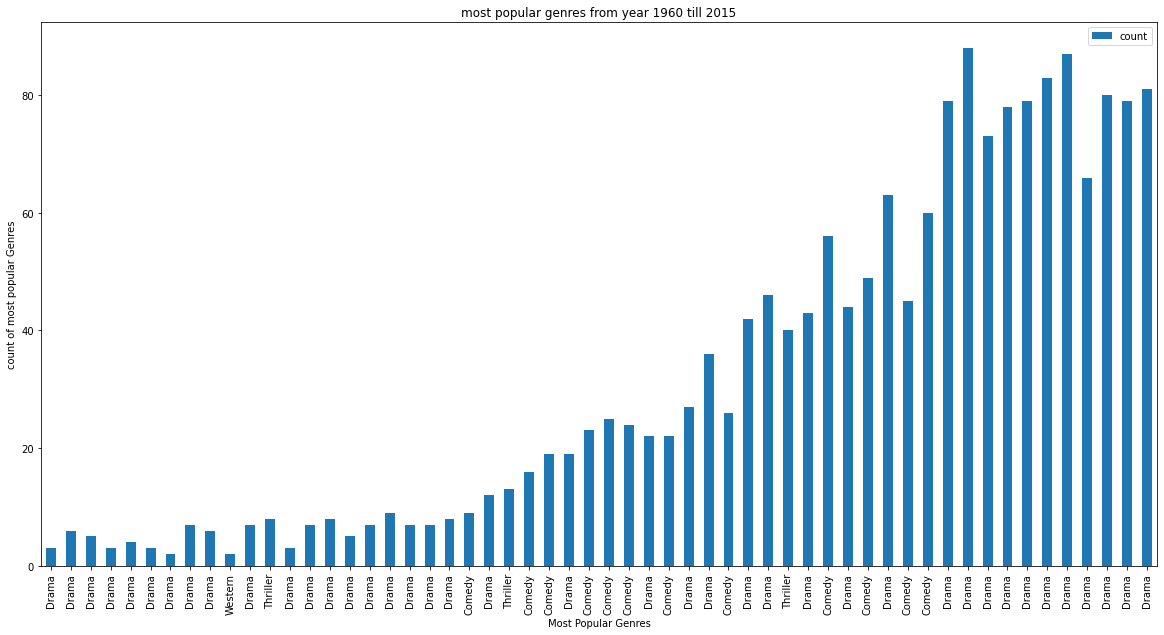

In [101]:
#this plot display the most popular Genre Every year starting from  1960 till 2015 

year_count.plot(kind='bar', x= 'most_genre', y='count',figsize=(20,10))
plt.title('most popular genres from year 1960 till 2015')
plt.xlabel('Most Popular Genres')
plt.ylabel('count of most popular Genres')

In [102]:
#Map each Genre with unique Color
color_Genre = year_count.most_genre.map(dict(Drama='green', Comedy='red', Thriller='black',Western='cyan'))

Text(0, 0.5, 'count of most popular Genres')

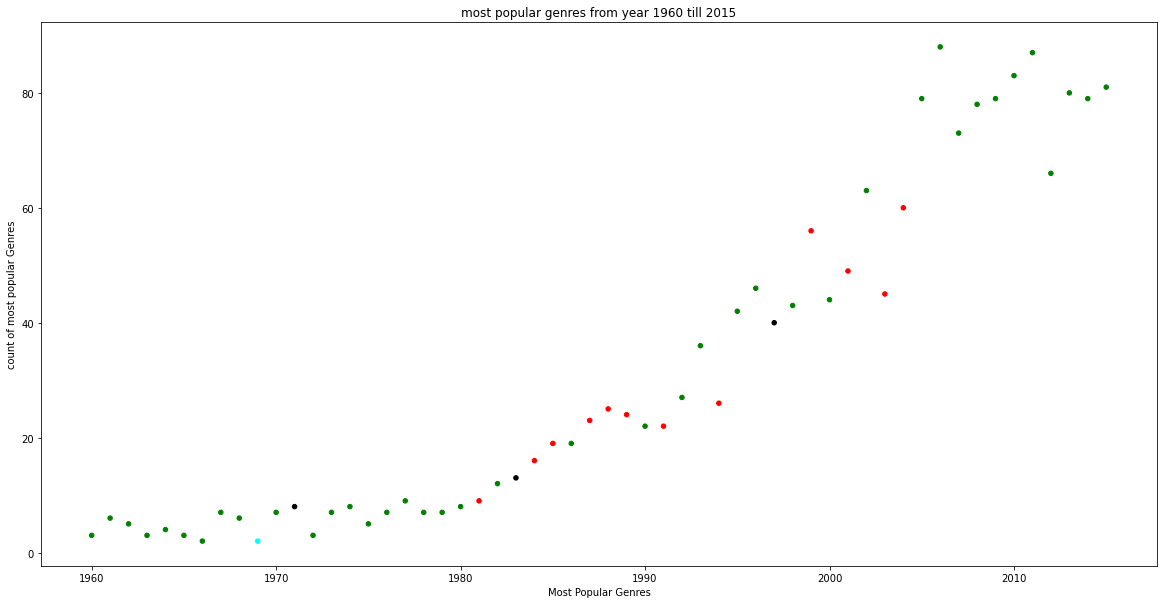

In [104]:
year_count.plot.scatter( 'year','count' ,c=color_Genre,figsize=(20,10))


plt.title('most popular genres from year 1960 till 2015')
plt.xlabel('Most Popular Genres')
plt.ylabel('count of most popular Genres')

Text(0, 0.5, 'count of most popular Genres')

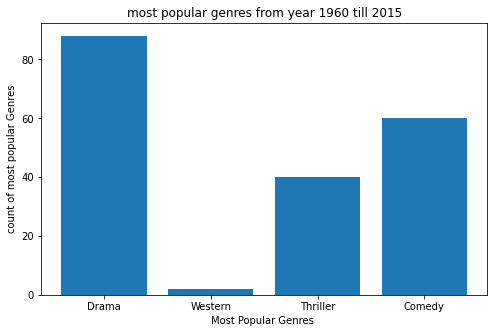

In [105]:
#Plot the most Popular Genres across the years between 1960 and 2015
plt.subplots(figsize=(8, 5))
plt.bar(year_count['most_genre'], year_count['count'])
plt.title('most popular genres from year 1960 till 2015')
plt.xlabel('Most Popular Genres ')
plt.ylabel('count of most popular Genres')


### Question 2  (What kinds of properties are associated with movies that have high revenues?)
> - Create a df of 100 rows sorted according to the revenue
> - get properties depend on the budget, vote_counts, Popularity and vote average
> - 47% of Movies have budget more than 154235000 $
> - 50% of Movies have vote_average more than 6.9
> - 36% of Movies have popularity more than 5.1



In [45]:

df_movies.head()


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [46]:
reven = df_movies.copy()

In [47]:
#Create a df of 100 rows sorted according to the revenue
reven = reven.sort_values(by=['revenue'], ascending=False).head(100)

In [48]:
reven

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
4381,2.592896,225000000,624026776,Men in Black 3,Will Smith|Tommy Lee Jones|Josh Brolin|Michael...,Barry Sonnenfeld,Action|Comedy|Science Fiction,Amblin Entertainment|Media Magik Entertainment...,5/23/12,3142,6.1,2012
1920,5.704860,200000000,623933331,Iron Man 2,Robert Downey Jr.|Gwyneth Paltrow|Don Cheadle|...,Jon Favreau,Adventure|Action|Science Fiction,Marvel Studios,4/28/10,4920,6.6,2010
7389,2.764535,150000000,623722818,Ratatouille,Patton Oswalt|Ian Holm|Lou Romano|Brian Denneh...,Brad Bird|Jan Pinkava,Animation|Comedy|Family|Fantasy,Walt Disney Pictures|Pixar Animation Studios,6/22/07,2434,7.3,2007
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014


In [49]:
reven.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,5.191795,1.542350e+08,8.979584e+08,3475.060000,6.909000,2007.970000
std,4.467371,6.694002e+07,3.189943e+08,1839.603382,0.651199,6.817172
min,0.436803,1.050000e+07,6.118994e+08,201.000000,5.600000,1977.000000
25%,2.755044,1.122500e+08,7.097980e+08,2245.750000,6.400000,2004.750000
50%,4.264860,1.500000e+08,8.079637e+08,3169.500000,6.950000,2010.000000
75%,6.067551,2.000000e+08,9.590500e+08,4266.000000,7.400000,2013.000000
max,32.985763,3.800000e+08,2.781506e+09,9767.000000,8.100000,2015.000000


In [50]:
reven.budget.mean()

154235000.0

In [51]:
reven.query('budget>budget.mean()').budget.count()

47

## 47% of Movies have budget more than 154235000 $ 

In [52]:
reven.query('vote_average>vote_average.mean()').vote_average.count()

50

## 50% of Movies have vote_average more than 6.9

In [53]:
reven.query('popularity>popularity.mean()').popularity.count()

36

## 36% of Movies have popularity more than 5.1

In [54]:
reven.query('vote_count>vote_count.mean()').vote_count.count()

39

## 39% of Movies have Vote_counts more than 3475

# Question3(which popular movies had the highest budgets?)

In [62]:
# create new copy from df_movies as budget_popular Moive
df_movies.head()
budget_popular = df_movies.copy()

In [63]:
# sort budget_popular according to popularity and then budget and take only the first 10 movies 
budget_popular = budget_popular.sort_values(by=['popularity','budget'], ascending=False).head(10)

In [64]:
budget_popular.shape

(10, 12)

In [65]:
budget_popular.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [66]:
budget_popular.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,17.212237,1.271000e+08,7.971451e+08,4620.700000,7.240000,2010.700000
std,8.274145,6.388088e+07,5.880933e+08,1422.553576,0.629285,11.851395
min,10.739009,1.100000e+07,7.873990e+07,2480.000000,6.300000,1977.000000
25%,11.576547,1.137500e+08,4.392654e+08,3654.500000,6.700000,2014.000000
50%,13.041767,1.500000e+08,7.334334e+08,4860.000000,7.300000,2014.000000
75%,22.289652,1.687500e+08,7.748766e+08,5599.500000,7.825000,2015.000000
max,32.985763,2.000000e+08,2.068178e+09,6498.000000,8.000000,2015.000000


In [67]:
# Most popular movies acording to the highest budget
budget_popular.head()['original_title']

0               Jurassic World
1           Mad Max: Fury Road
629               Interstellar
630    Guardians of the Galaxy
2                    Insurgent
Name: original_title, dtype: object

Text(0, 0.5, 'popularity')

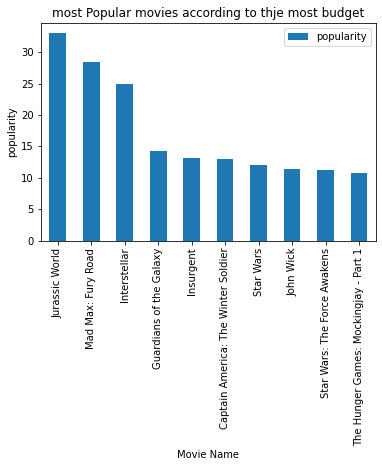

In [69]:
# Bar Chart show the most popular movies according to the highest budget
budget_popular.plot.bar(  'original_title', 'popularity')
plt.title('most Popular movies according to thje most budget')
plt.xlabel('Movie Name')
plt.ylabel('popularity')


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!



# Question 1 (Which genres are most popular from year to year?)


#### Steps
> - Create new dataframe that will contain only wanted columns genres and release_year
> - Create New list that contain all the genres found in the dataFrame
> - Craete new columns that contain count of each Genres
> - Group the dataFrame by release_year and count each Genre in each release_year
> - create new column that contain the most popular Genre in each release_year
> - create new column that contain the Count of  most popular Genre in each release_year
> - Remove all the Genres Count from the year_count
> - Create Year column and change its type to be string to help me in Bar visualization
> - plot scatter plot and bar plot display the most popular Genre Every year starting from  1960 till 2015 
> - Plot Bar chart visulaization that represend the share of the most repeated Genres across the period from 1960 till 2015,
Genres are 
Comedy, Western, Drama, Thriller
> ### - The most popular genres are: Drama, Comady, Thriller and Western.
> ### - the most popular is Drame which has reperated about 1372


# Question 2 (What kinds of properties are associated with movies that have high revenues?)

>### the analysis was for the most 100 movies in revenue and i found the following properties

>#### * 47% of Movies have budget more than $ 154235000 
>#### * 50% of Movies have vote_average more than 6.9
>#### * 36% of Movies have popularity more than 5.1 


# Question3(which popular movies had the highest budgets?)

> ### - the analysis was to the first 10 movies 
> ### - the most popular movie with most budget is 'Jurassic World' then 'Mad MAX'